In [ ]:
#jupyter nbconvert Presention --to slides --no-input --stdout --TemplateExporter.exclude_input=True > index.html

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [11]:
df_final = pd.read_csv("df_final.csv", delimiter=";")
df_kunden = df_final[df_final["Kunde"] == True]
df_besucher = df_final[df_final["Besucher"] == True]

<font size = "8">Elektrauto AG<font/>

<i>HWR Berlin, Sommersemester 2024</i>

<i>Phillip Raouf, Gereon Dregger, Lan Nhi Vu<i/>
  


# N1: Wie viele Autos wurden verkauft?

In [3]:
print(df_final.Preis.count())

1104


## N2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [4]:
# N2 Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?
# Verwendung von max-, min- und mean-Funktion - angewendet auf die Preisspalte
print("Hoechstpreis: " + str(df_final.Preis.max()))
print("Mindestpreis: " + str(df_final.Preis.min()))
print("Durchschnittspreis: " + str(df_final.Preis.mean()))

Hoechstpreis: 149827.25
Mindestpreis: 21471.65
Durchschnittspreis: 88905.85917119564


## N3: Wie hoch war der Gesamtumsatz ?

In [5]:
# Die Preisspalte aufsummieren
print("Gesamtumsatz: " + str(df_final.Preis.sum().round(2)))

Gesamtumsatz: 98152068.52


# N4: Wie viele Autos wurden pro Bundesland verkauft?

In [6]:
# Nach Niederlassungen gruppieren, danach zählen 
df_numbers = df_final.groupby(df_final.Niederlassung).count()
df_numbers = df_numbers.Preis
print(df_numbers)

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Düsseldorf               1
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    174
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64


In [7]:
# Beispielhaft anhand von Sachsen die vorherige Auflistung verifizieren
# Bei Preis existieren 89 Einträge wie auch oben, also korrekt!
df_final.query("Niederlassung == 'Sachsen'").count()

Alter            162
Einkommen        162
Preis             89
Geschlecht       162
Zeit             162
KundeNr          162
Niederlassung    162
Besucher         162
Kunde            162
dtype: int64

# N5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [8]:
# Nach Niederlassung gruppieren, dann den Durchschnitt des Preises nehmen, die Werte absteigend sortieren und runden
df_final.groupby(df_final.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2)

Niederlassung
Hamburg                 85549.50
Hessen                  85864.93
Brandenburg             86673.64
Niedersachsen           87165.91
Nordrhein-Westfalen     88451.76
Bayern                  89344.31
Sachsen                 89455.08
Berlin                  89584.98
Thüringen               90816.99
Baden-Württemberg       90969.56
Düsseldorf             120215.50
Name: Preis, dtype: float64

Text(0, 0.5, 'Umsatz')

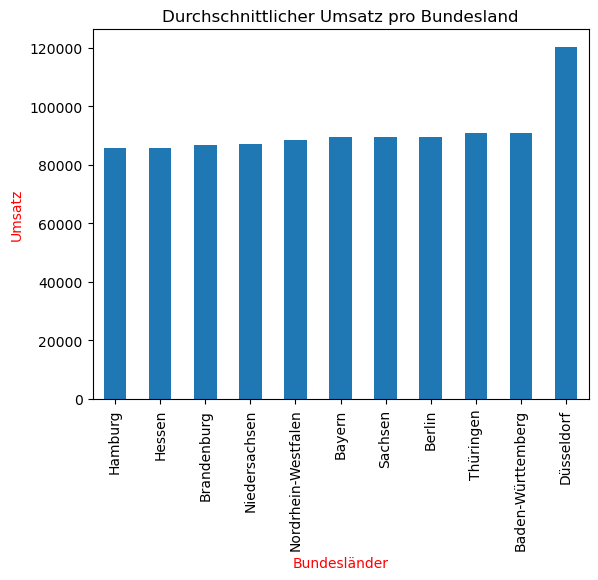

In [9]:
# Barplot der Ergebnisse erstellen. 

avg_umsatz = df_final.groupby(df_final.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2).plot(kind="bar", title="Durchschnittlicher Umsatz pro Bundesland")
plt.xlabel("Bundesländer", color="r")
plt.ylabel("Umsatz", color="r")

# Düsseldorf ist Spitzenreiter und sticht deutlich hervor
# Das erregt den Verdacht, das der dortige Standort größer, über ein besonderes Angebot verfügt oder das beste Marketing betreibt


# N7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

Prozentsatz Männer = 61.2%
Prozentsatz Frauen = 38.8%


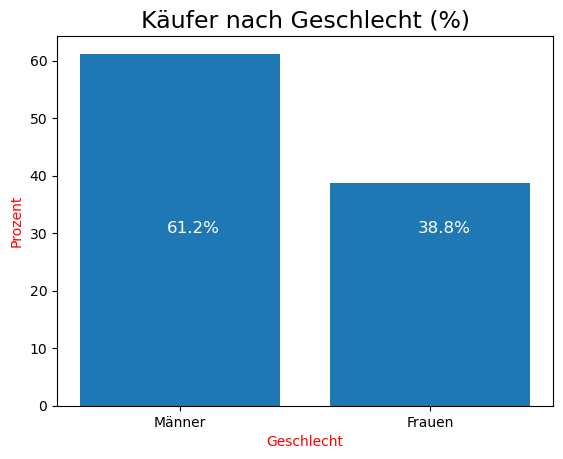

In [11]:
# Gesamtanzahl an Geschlechts-Eintragungen bestimmen -> Spalte "Geschlecht" auswählen und zählen
# Alternativ könnte man die .shape Funktion verwenden
gesamt = df_final.Geschlecht.count()

# Männer haben eine 1 erhalten in der Spalte. 
# Durch das aufsummieren erhalten wir die Gesamtanzahl an Männern, die wir dann ins Verhältnis zur Gesamtzahl der Eintragungen setzen können. 
männer = df_final.Geschlecht.sum()
männer_prozent = (männer/gesamt*100).round(2)
frauen_prozent = (100-männer_prozent.round(2))

print("Prozentsatz Männer = " + str(männer_prozent) + "%")
print("Prozentsatz Frauen = " + str(frauen_prozent) + "%")

# Barplot erstellen um die Ergebnisse zu veranschaulichen
prozent_h = [männer_prozent, frauen_prozent]
labels = ["Männer", "Frauen"]
plt.bar(labels, prozent_h)
plt.xlabel("Geschlecht", color="r")
plt.ylabel("Prozent", color="r")
plt.title("Käufer nach Geschlecht (%)", fontsize=17)
plt.text(x=-0.05, y=30,s=(str(männer_prozent) + "%"), color="white", fontsize=12)
plt.text(x=0.95, y=30,s=(str(frauen_prozent) + "%"), color="white", fontsize=12)
plt.show()

# Männer sind unsere Hauptkundengruppe, was eine wertvolle Information für das Marketing darstellt

# N8: Durchschnittsalter Kunden/Besucher

In [13]:
# Auf die ursprünglichen Dataframes zugreifen, um jeweils den Durchschnitt zu extrahieren
# Alternativ hätte man im final_df die Einträge auswählen müssen, wo > 0 für Kunden und NaN für Besucher
print("Durchschnittsalter Kunden: " + str(df_kunden.Alter.mean()))
print("Durchschnittsalter Besucher: " + str(df_besucher.Alter.mean()))

Durchschnittsalter Kunden: 50.375
Durchschnittsalter Besucher: 49.88103254769921


# N16: Welche Variable beeinflusst Preis am meisten?

In [15]:
# Einen gefilterten Dataframe erstellen, der nur die Kundendaten enthält 
df_clean = df_final[df_final.index <= 1103] # Alles über dem Index 1103 sind Besucherdaten

In [21]:
# Zielvariable und Prädiktoren definieren
y = df_clean["Preis"]
X = df_clean[["Geschlecht", "Alter", "Einkommen"]]

# Daten standardisieren (z-Score-Werte berechnen) um Vergleichbarkeit zu schaffen
y_standardized = (y - y.mean()) / y.std()
X_standardized = (X - X.mean()) / X.std()

# Konstante hinzufügen
X_standardized = sm.add_constant(X_standardized)

# Modell erstellen und anpassen
model_standardized = sm.OLS(y_standardized, X_standardized).fit()

# Zusammenfassung des Modells 
print(model_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1576.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:35:21   Log-Likelihood:                -645.62
No. Observations:                1104   AIC:                             1299.
Df Residuals:                    1100   BIC:                             1319.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.145e-16      0.013  -8.74e-15      1.0

# N20: Vorschläge für zusätzliche Datenerhebung

1. Beruf der Kunden
2. Lief zu dem Zeitpunkt des Verkaufs eine Rabattaktion
3. Investitionen in das Marketing/die Vermarktung

# N10: Statistisch signifikanter Unterschied Durchschnittseinkommen Kunden und Besucher

In [ ]:
#df_besucher["Einkommen"] = df_besucher.Einkommen.astype("float32")

In [13]:
# Inwiefern der Unzterschied von statistishcer Signifikanz ist können wir mit dem T-Test feststellen
from scipy.stats import ttest_ind

# Extrahieren der Einkommensdaten aus den DataFrames
einkommen_kunden = df_kunden['Einkommen']
einkommen_besucher = df_besucher['Einkommen']

# t-Test durchführen
t_stat, p_value = ttest_ind(einkommen_kunden, einkommen_besucher, equal_var=True)

# Ausgabe der Ergebnisse
print(f"T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

if p_value < 0.05:
    print("Die Nullhypothese wird abgelehnt. Es besteht ein signifikanter Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher.")
else:
    print("Die Nullhypothese kann nicht abgelehnt werden. Es besteht kein signifikanter Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher.")
    
    # Das Ergebnis bestätigt unseren Eindruck das der Unterschied nicht signifikant ist

T-Statistik: -0.7139232519331452
P-Wert: 0.4753582357317724
Die Nullhypothese kann nicht abgelehnt werden. Es besteht kein signifikanter Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher.


# N11: Beziehung zwischen Alter, Einkommen, Preis und Zeit (für Kunden)


In [15]:
# Neuen df mit den entscheidenden Spalten erstellen, Pearson-Corr-Matrix berechnen
# Im Hinterkopf behalten, dass Pearson anfällig gegenüber Ausreißern ist und nur lineare Beziehungen erfassen kann
df_kunden_numeric = pd.DataFrame(df_kunden, columns=["Alter", "Einkommen", "Preis", "Zeit"])
df_kunden_numeric.corr()
# Die Beziehung zwischen Preis und Einkommen ist am höchsten, mit einem Korrelatioskoeffizienten von 0.88

,Alter,Einkommen,Preis,Zeit
Alter,1.000000,0.752180,0.779762,0.588873
Einkommen,0.752180,1.000000,0.882248,0.762539
Preis,0.779762,0.882248,1.000000,0.703884
Zeit,0.588873,0.762539,0.703884,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

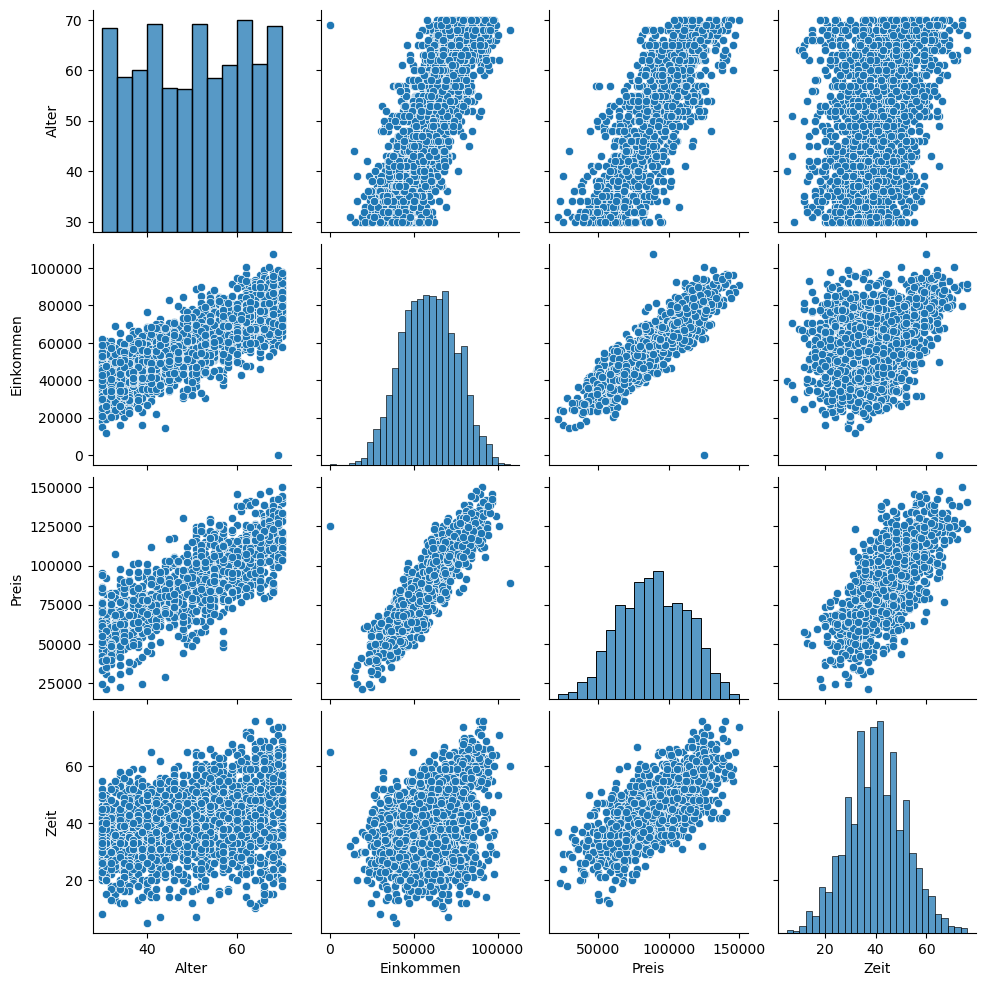

In [21]:
# Einen sns pairplot erstellen, um die Beziehungen genauer unter die Lupe zu nehmen
# Der Plot zeigt im Matrixformat einen Scatterplot zwischen den Variablen sowie in der Mitte die Verteilung der Daten

sns.pairplot(data=df_final, vars=["Alter", "Einkommen", "Preis", "Zeit"])

# N14: sozioökonomische Merkmale gegen Kaufpreis regressieren

In [24]:
df_final.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung,Besucher,Kunde
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern,False,True
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin,False,True
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg,False,True
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern,False,True
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen,False,True


In [26]:
# Einen gefilterten Dataframe erstellen, der nur die Kundendaten enthält 
df_clean = df_final[df_final.index <= 1103] # Alles über dem Index 1103 sind Besucherdaten

In [28]:
df_clean.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung,Besucher,Kunde
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern,False,True
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin,False,True
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg,False,True
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern,False,True
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen,False,True


In [30]:
# Noch einmal prüfen, ob keine NaNs vorhanden sind (Wichtig bei Regression)
df_clean.isna().mean()

Alter            0.0
Einkommen        0.0
Preis            0.0
Geschlecht       0.0
Zeit             0.0
KundeNr          0.0
Niederlassung    0.0
Besucher         0.0
Kunde            0.0
dtype: float64

In [32]:
# Abhängige und unabhängige Variablen definieren
y = df_clean["Preis"]
X = df_clean[["Alter", "Einkommen", "Geschlecht"]]

# Hinzufügen konstanter Term
X = sm.add_constant(X)

# Erstellen und Anpassen des Modells
reg_res = sm.OLS(y, X).fit()

# Anzeigen der Zusammenfassung des Modells
print(reg_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1576.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:40:06   Log-Likelihood:                -11797.
No. Observations:                1104   AIC:                         2.360e+04
Df Residuals:                    1100   BIC:                         2.362e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1341.3476   1451.582      0.924      0.3

In [34]:
alpha = reg_res.params["const"]
print("Der Achsenabschnitt beträgt: " + str(round(alpha, 2)))

Der Achsenabschnitt beträgt: 1341.35


In [36]:
beta1 = reg_res.params["Alter"]
print("Eine Erhöhung des Alters um ein Jahr führt zu einer Zunahme des Kaufpreises um: " + str(round(beta1, 2)))

Eine Erhöhung des Alters um ein Jahr führt zu einer Zunahme des Kaufpreises um: 547.94


In [38]:
beta2 = reg_res.params["Einkommen"]
print("Eine Erhöhung des Einkommens um einen Euro führt zu einer Zunahme des Kaufpreises um: " + str(round(beta2, 2)))

Eine Erhöhung des Einkommens um einen Euro führt zu einer Zunahme des Kaufpreises um: 1.0


In [40]:
r_squared = reg_res.rsquared
print("Die Variablen Alter und Einkommen erklären " + str(round(r_squared, 2)*100) + "% der Variabilität beim Preis")

Die Variablen Alter und Einkommen erklären 81.0% der Variabilität beim Preis


Signifikante Prädiktoren: Alle unabhängigen Variablen (Alter, Einkommen) sind signifikante Prädiktoren für den Kaufpreis (p-Werte < 0.05).

### Vielen Dank fuer ihre Aufmerksamkeit!